In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
from datetime import datetime

%matplotlib inline

plt.style.use('default')
sns.set(style="whitegrid")
pd.options.display.float_format= '{:20,.2f}'.format

In [3]:
dtypes= {'platform': 'int8', 'ref_type_id': 'int8', 'source_id': 'int8'}
subastas= pd.read_csv('Datos\\auctions.csv.gzip',compression='gzip', dtype = dtypes, parse_dates= ['date'], low_memory=False)

In [36]:
dtypes2= {'event_id': 'int16', 'application_id': 'int16', 'connection_type': 'str'}
eventos= pd.read_csv('Datos\events.csv.gzip',compression='gzip',engine='python',dtype = dtypes2, parse_dates= ['date'])
eventos[['wifi']]= eventos[['wifi']].astype('bool')

KeyboardInterrupt: 

In [2]:
dtypes3= {'advertiser_id': 'int8', 'source_id': 'int8', 'latitude': 'float16', 'longitude': 'float16', 'carrier_id': 'float16', 'brand': 'float16', 'touchX': 'float16', 'touchY': 'float16'}
clicks= pd.read_csv('Datos\clicks.csv.gzip',compression='gzip',engine='python',dtype = dtypes3)
clicks['device_id']=clicks['ref_hash']
del clicks['ref_hash']

In [22]:
instalaciones= pd.read_csv('Datos\installs.csv.gzip',compression='gzip',engine='python')
instalaciones['device_id']=instalaciones['ref_hash']
del instalaciones['ref_hash']

In [ ]:
#Hacer grafico de funnel: auctions--> clicks--> installs

In [18]:
subastas['cantidad']= subastas['device_id'].map(lambda x: 1)
usuariosSubastados= subastas.groupby('device_id')['cantidad'].sum()
del subastas['cantidad']
mayoresSubastados= usuariosSubastados.sort_values(ascending= False).head(20)
cantidadDeUsuariosSubastados= usuariosSubastados.count()

In [34]:
clicks['cantidad']= clicks['device_id'].map(lambda x: 1)
usuariosClickeadores= clicks.groupby('device_id')['cantidad'].sum()
del clicks['cantidad']

clickeadoresDeSubastas= pd.merge(usuariosSubastados, usuariosClickeadores, on='device_id', how='inner')
mayoresUsuariosSubastadosQueClickearon= clickeadoresDeSubastas['cantidad_y'].sort_values(ascending= False).head(20)
cantidadDeUsuariosSubastadosQueClickearon= clickeadoresDeSubastas.count()['cantidad_x']

In [35]:
instalaciones['cantidad']= instalaciones['device_id'].map(lambda x: 1)
usuariosInstaladores= instalaciones.groupby('device_id')['cantidad'].sum()
del instalaciones['cantidad']

instaladoresQueClickearonDesdeSubasta= pd.merge(clickeadoresDeSubastas, usuariosInstaladores, on='device_id', how='inner')
cantidadDeInstaladoresQueClickearonDesdeSubasta= instaladoresQueClickearonDesdeSubasta.count()['cantidad_x']

In [21]:
pd.merge(mayoresSubastados, mayoresUsuariosSubastadosQueClickearon, on='device_id', how='inner')

,cantidad,cantidad_y
device_id,,
6841615430383729819,12077,32
519658456951133298,10541,16
1800317677967270083,10036,14
8292793494956750501,9315,14


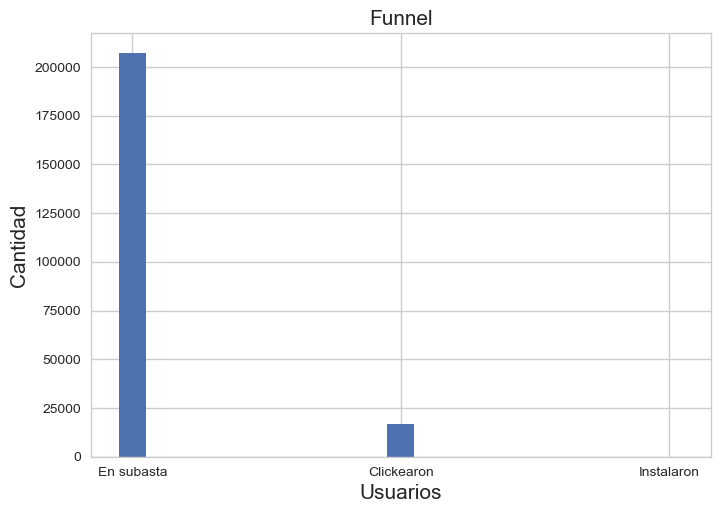

In [62]:
#Algoritmo basado en https://numython.github.io/posts/2016/02/graficas-de-barras-en-matplotlib/

fig = plt.figure() # Figure
ax = fig.add_subplot(111) # Axes

nombres = ['En subasta','Clickearon','Instalaron']
datos = [cantidadDeUsuariosSubastados,cantidadDeUsuariosSubastadosQueClickearon,cantidadDeInstaladoresQueClickearonDesdeSubasta]
xx = range(len(datos))

ax.bar(xx, datos, width=0.1, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(nombres)
ax.set_xlabel("Usuarios", fontsize=15)
ax.set_ylabel("Cantidad", fontsize=15)
ax.set_title("Funnel", fontsize=15)


plt.show()